<a href="https://colab.research.google.com/github/AhmedAkram392/AdaBoost_Classifier/blob/main/AdaBoost_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before getting into AdaBoost there are few concepts needed to be cleared:


1. Weak Learners(models)
These are models that are actually weak learners means these model have accuracy just above 50%
2. Decision Stumps 
Decsion stumps are one of weak learners basically this is the decision tree that has depth of max=1. Most time when developers implement adaboost they implement Adabos deploying decsion stumps
1. This decsion tree has output (+1) for positive class and (-1) for negative class.

One thing that can be analyzed here is that this decsion tree has only depth of one it means when you will be provided with data for different features or column with taret varaible then you can select one split which has max information gain or high decrease in entropy.(As you can see in below picture we can only make one split





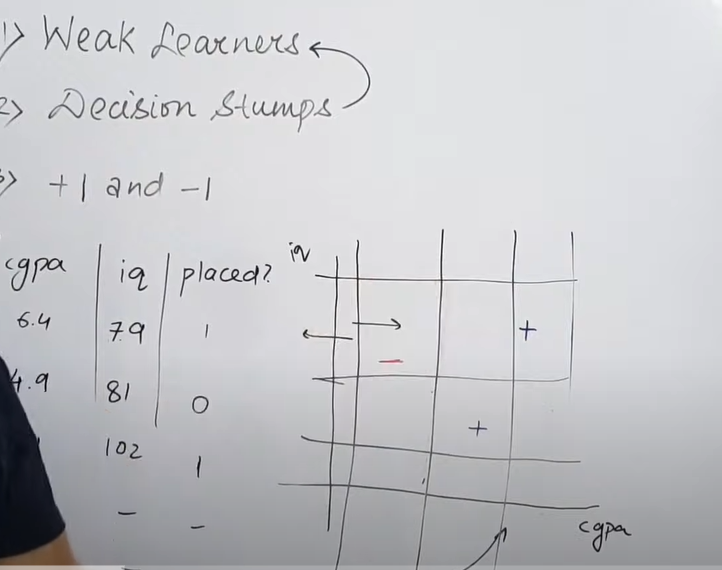

# Graphical Demonstration of AdaBoost

The writing blue ink shows the data on extreme left and then down there is an array for prediction and on right side we get the outputs form the model +1 or -1 then these outputs are multiplied with their weights 

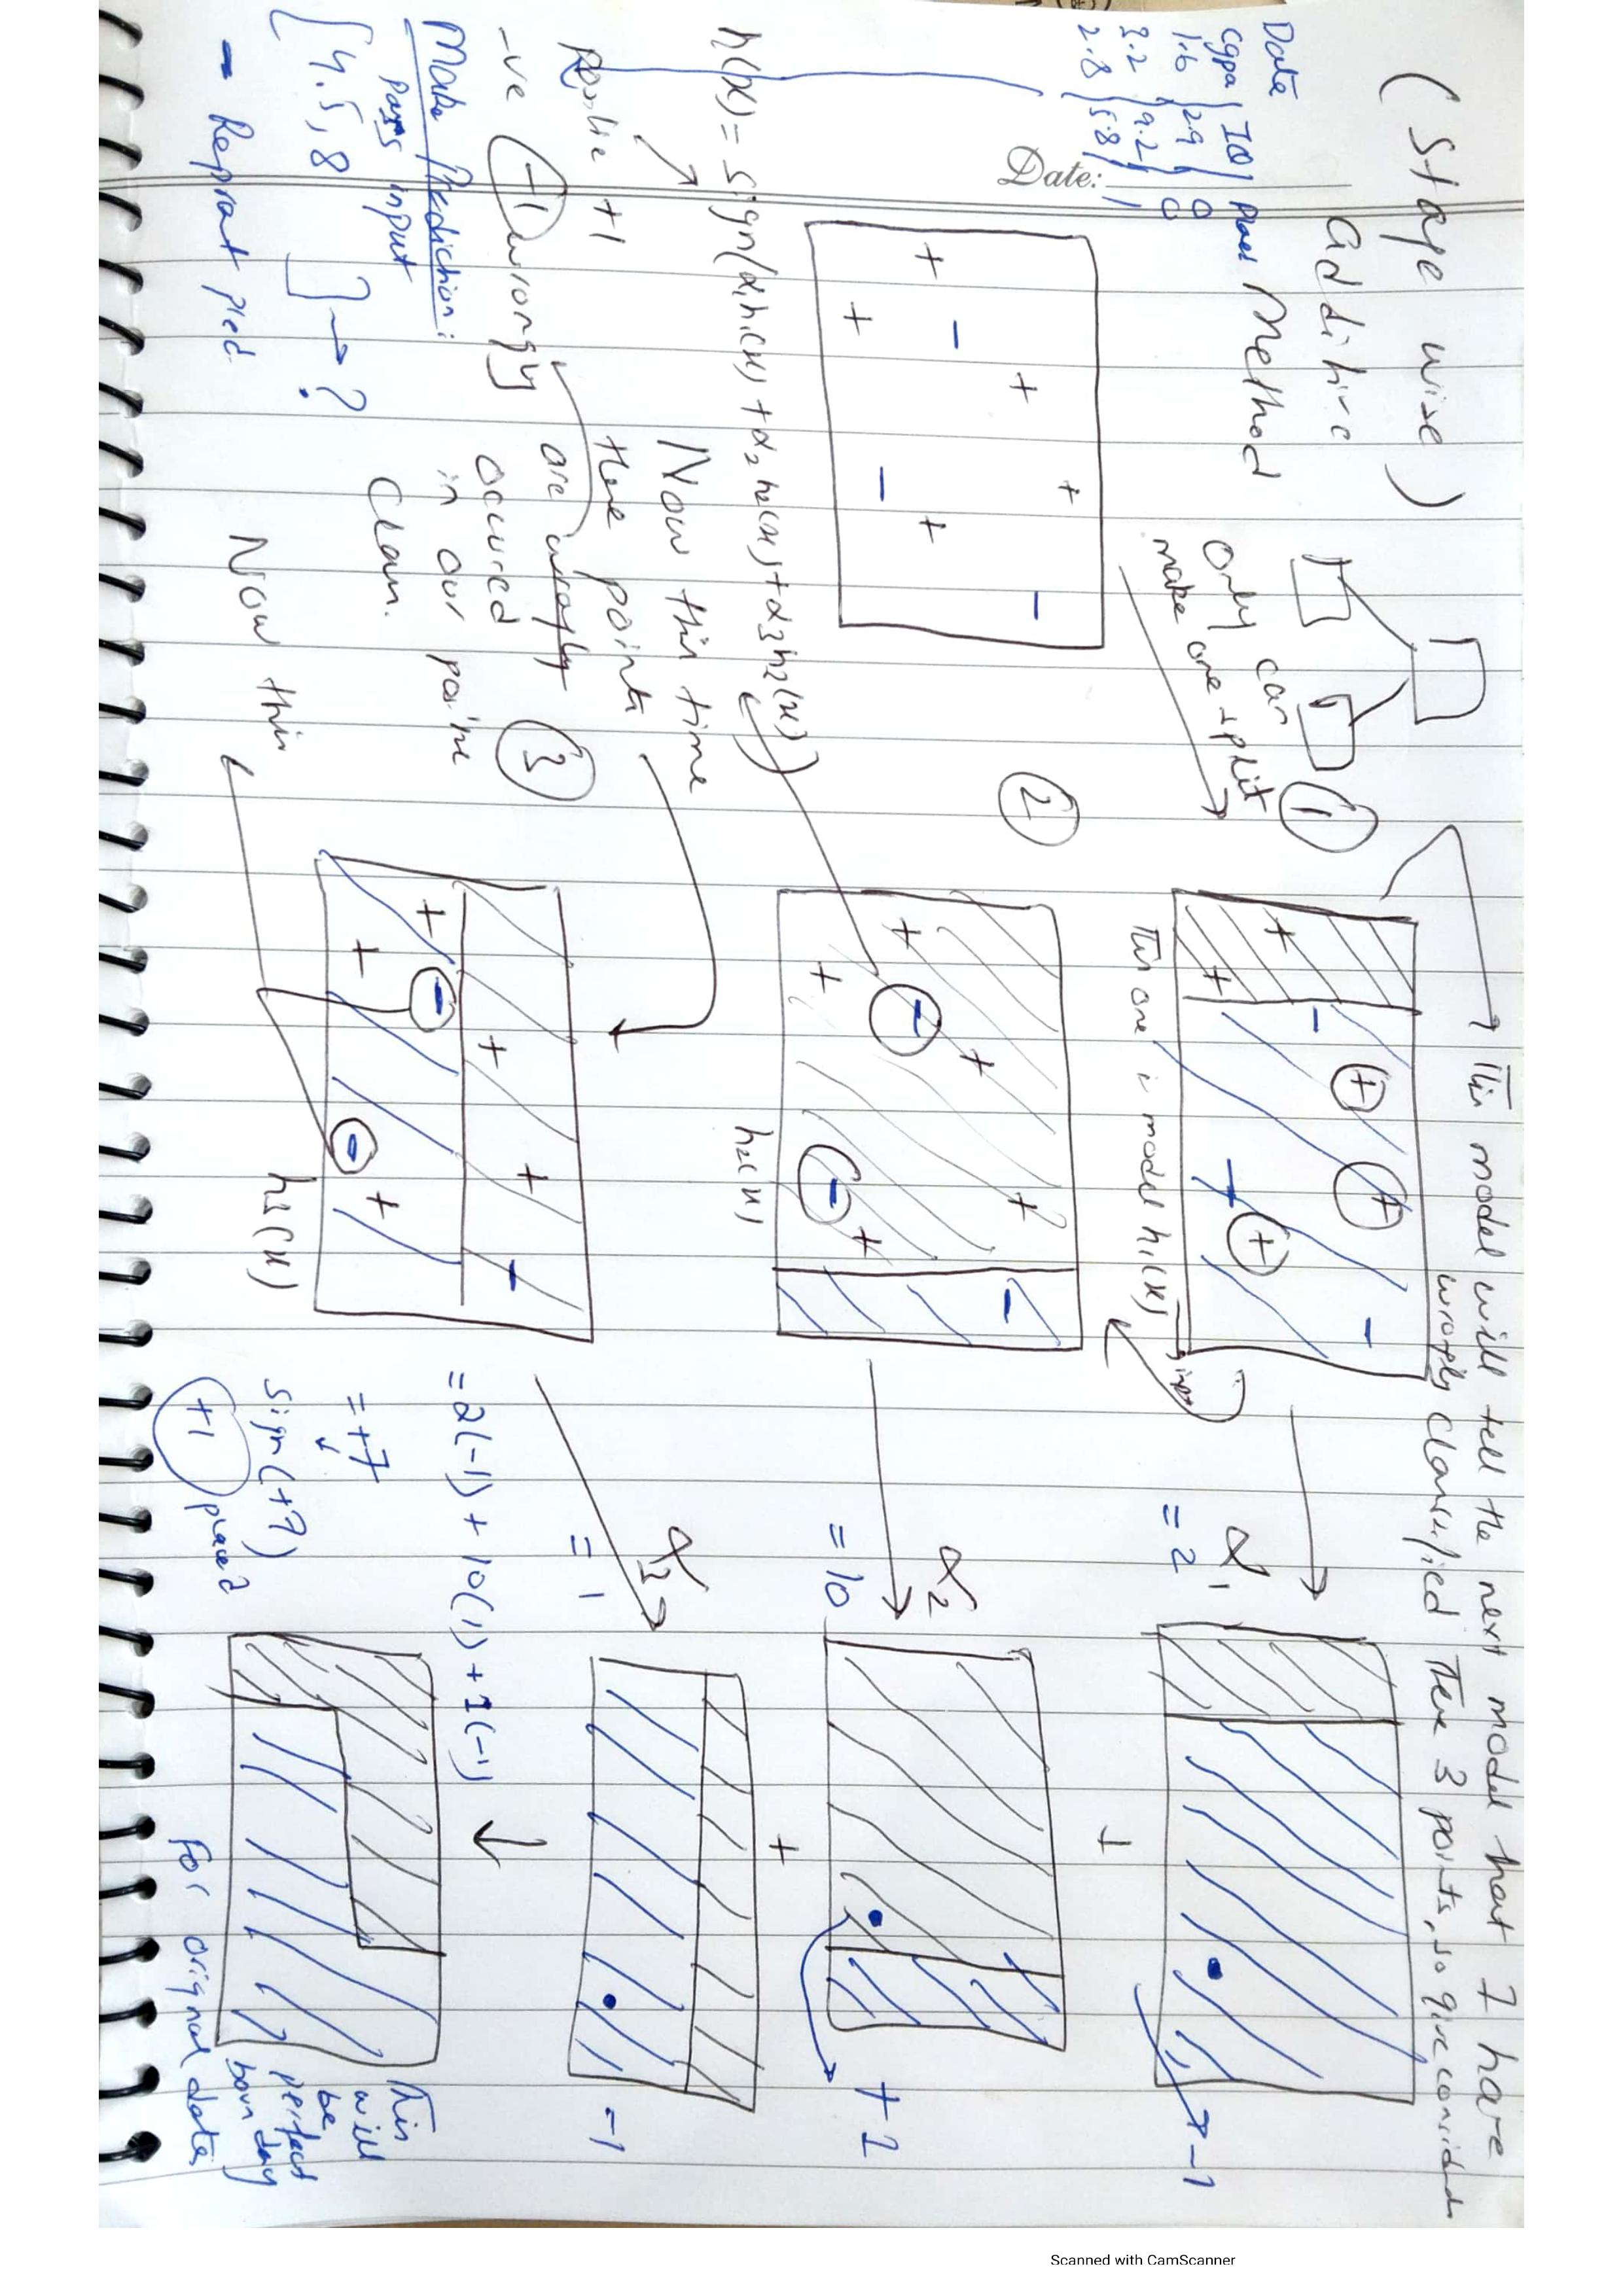

# Step by Step

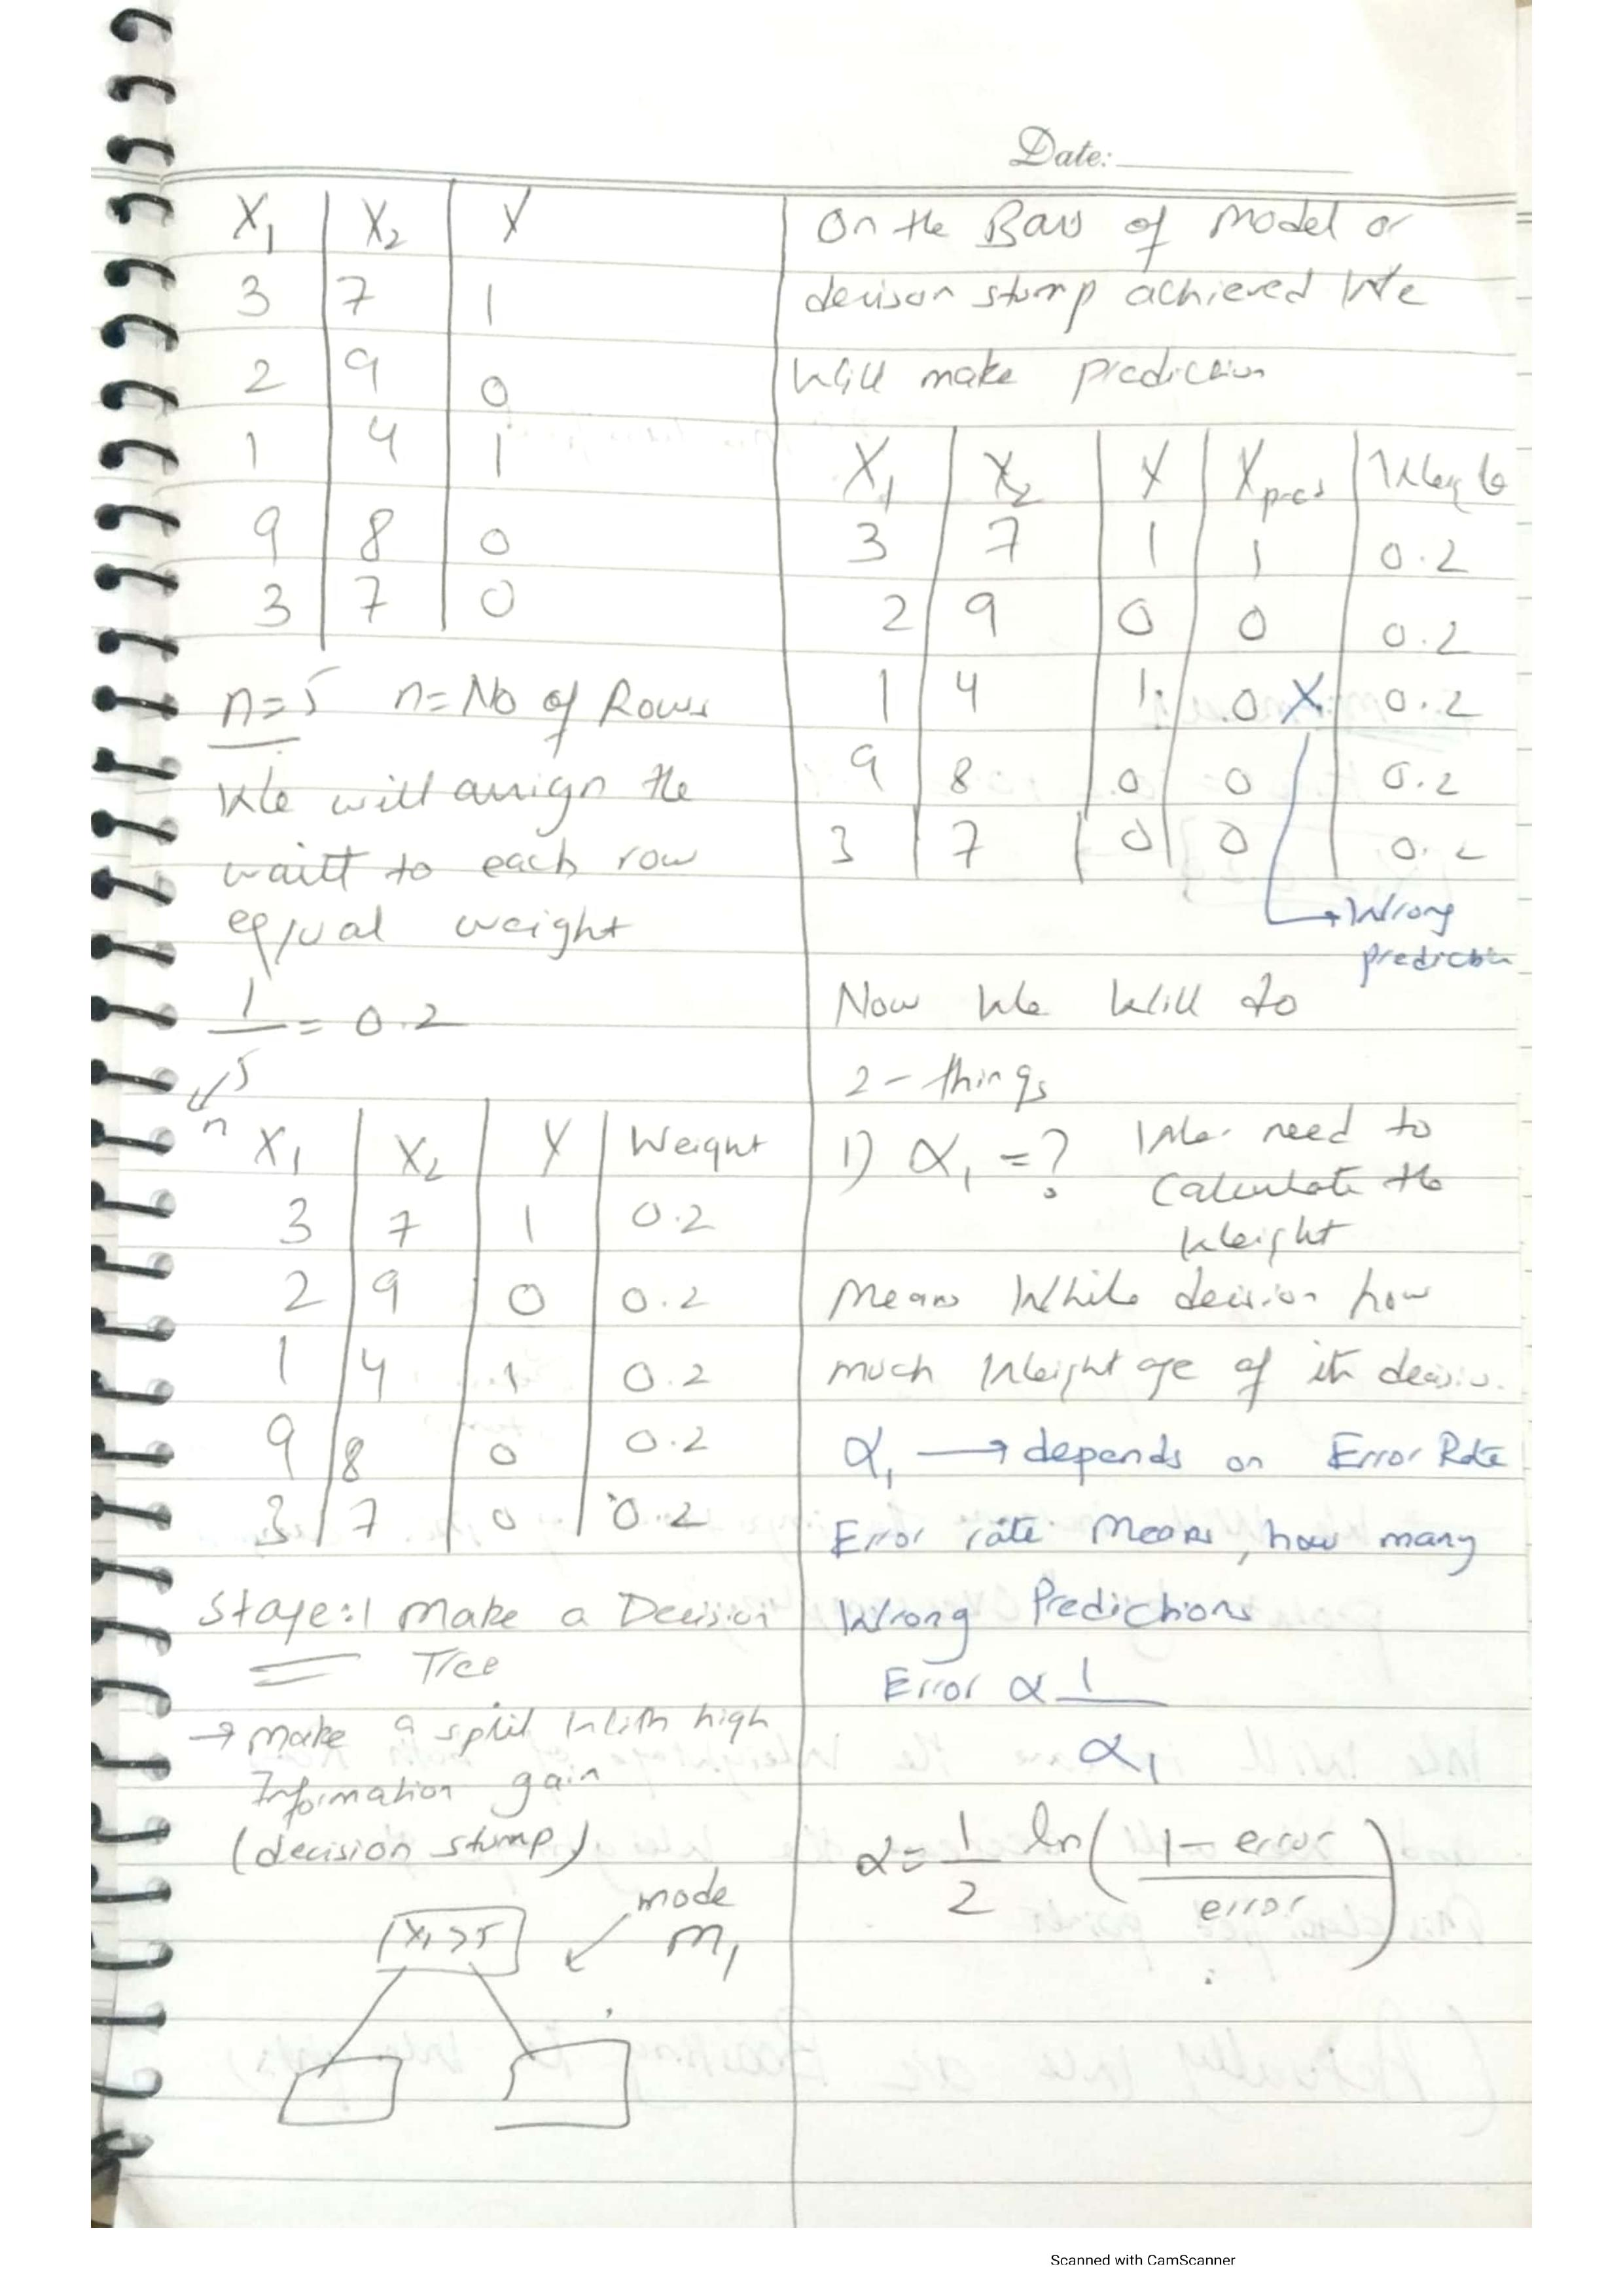

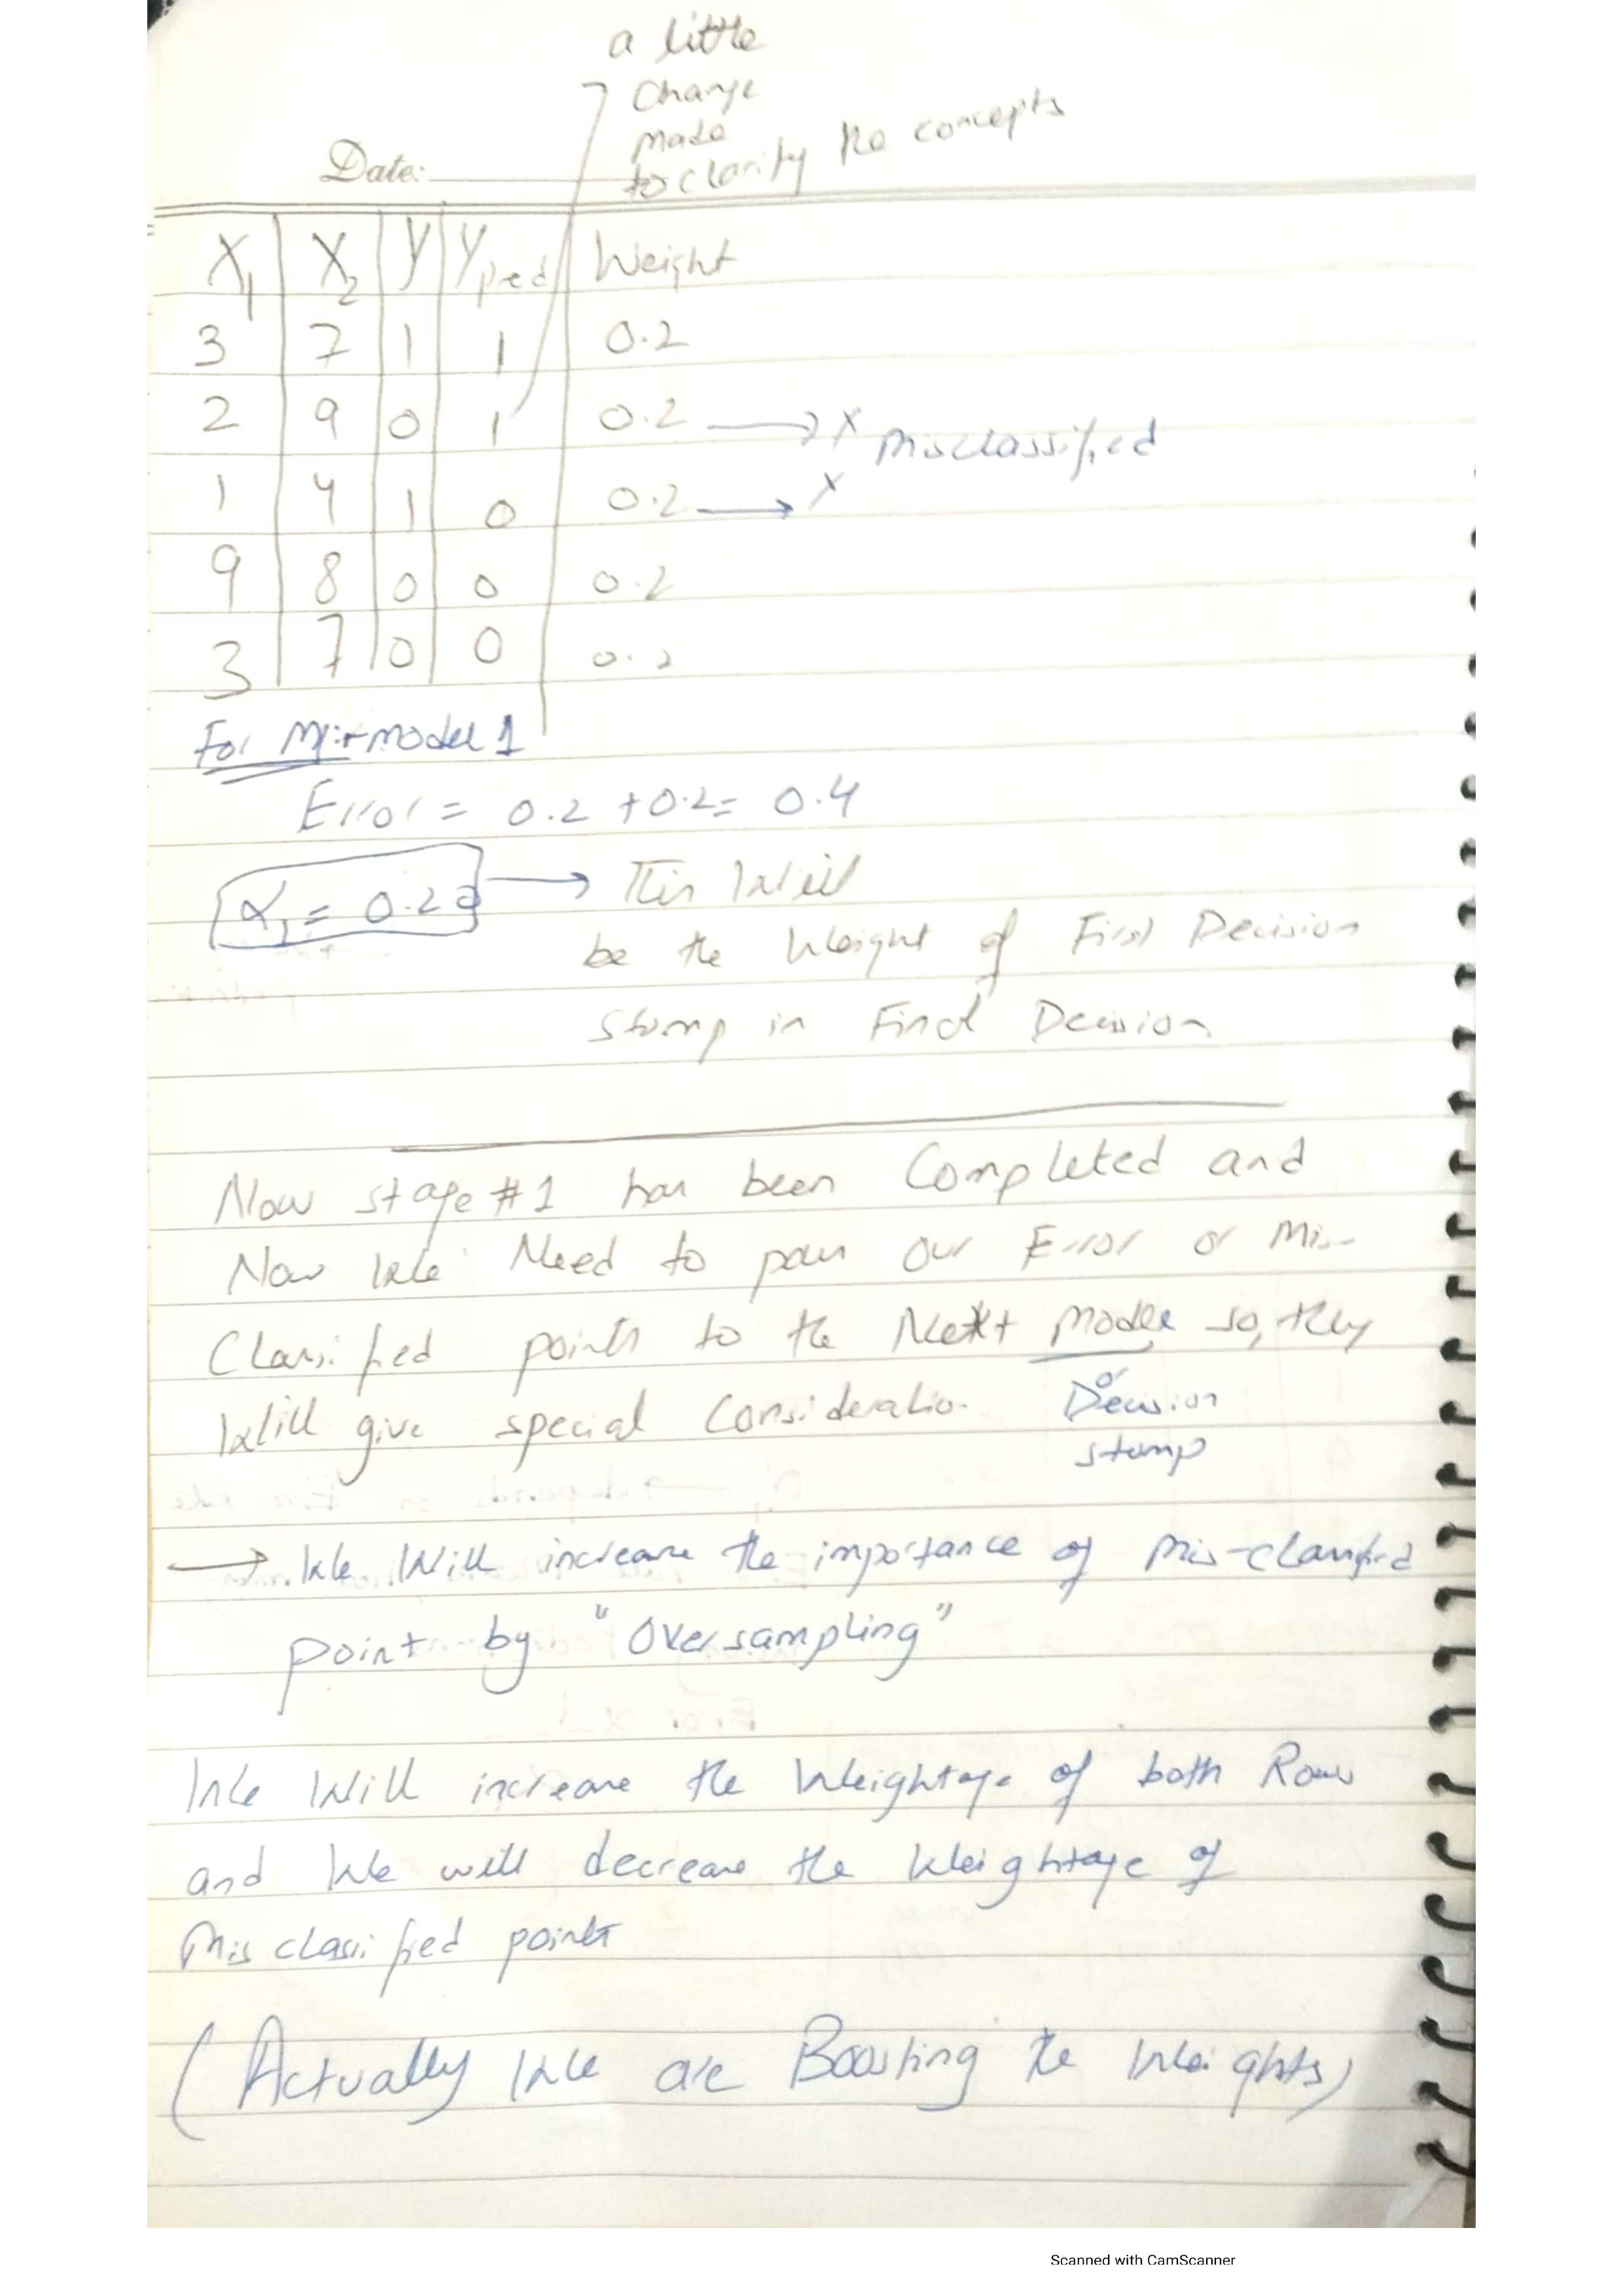

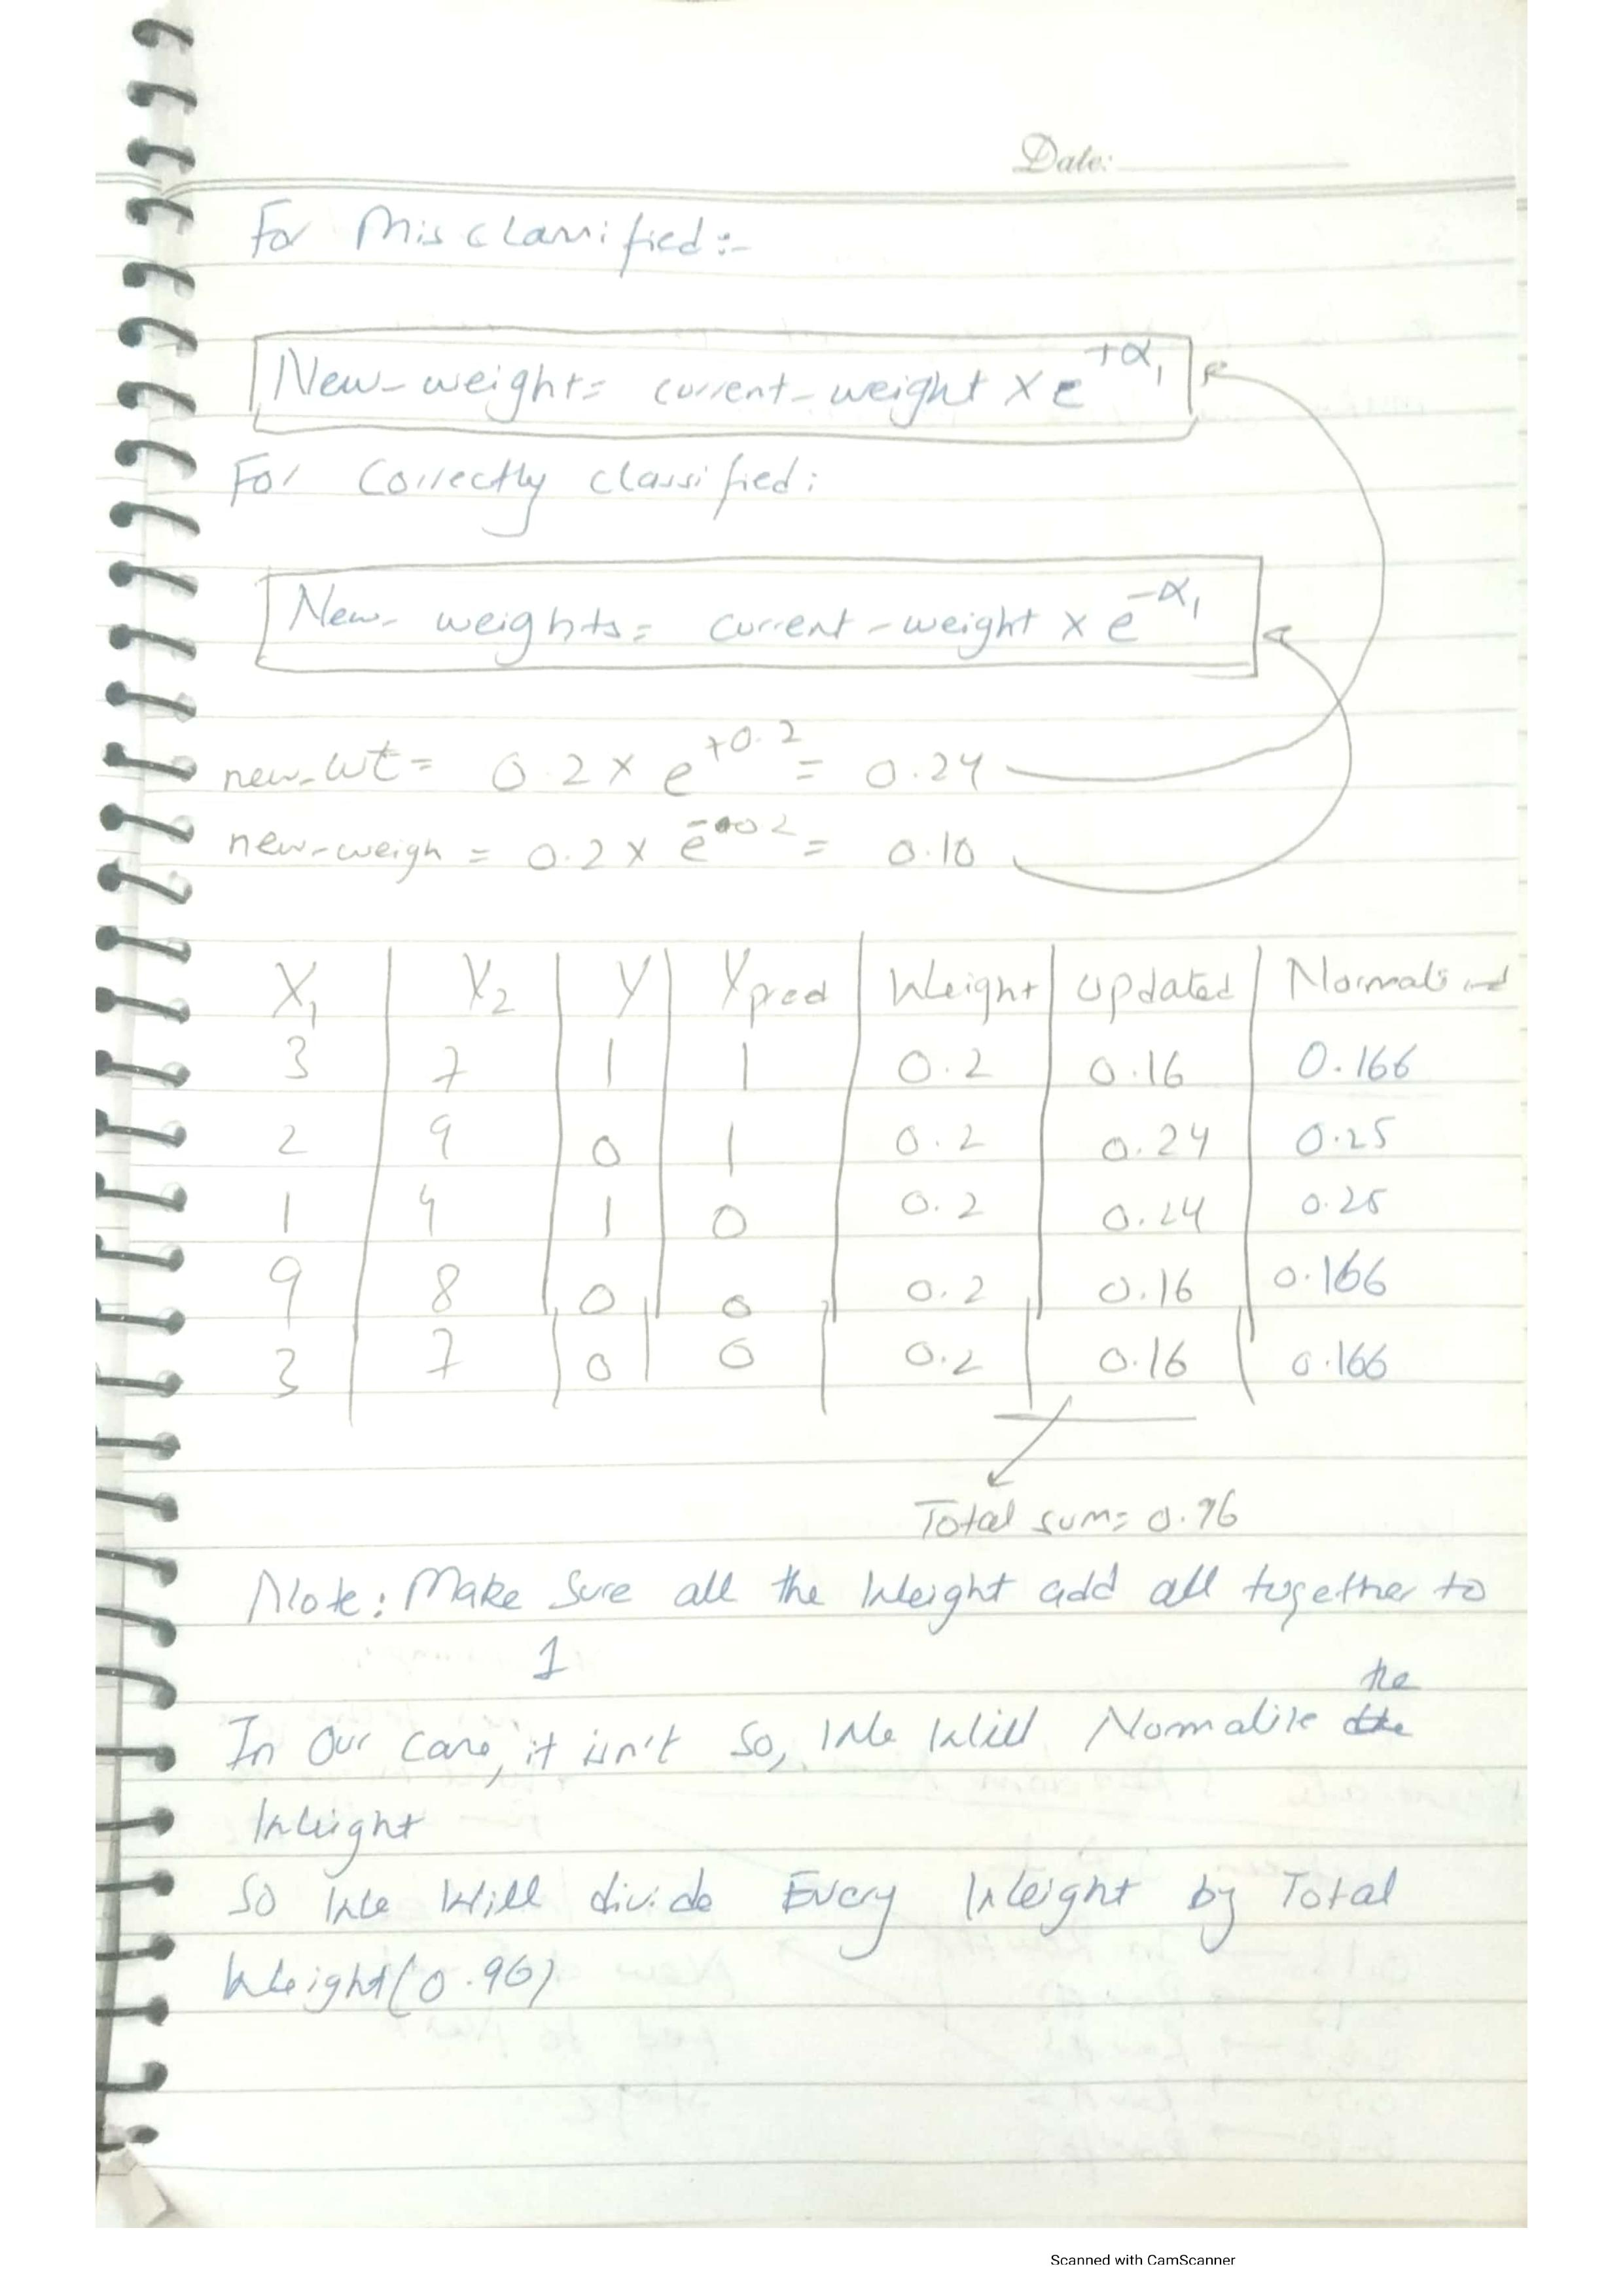

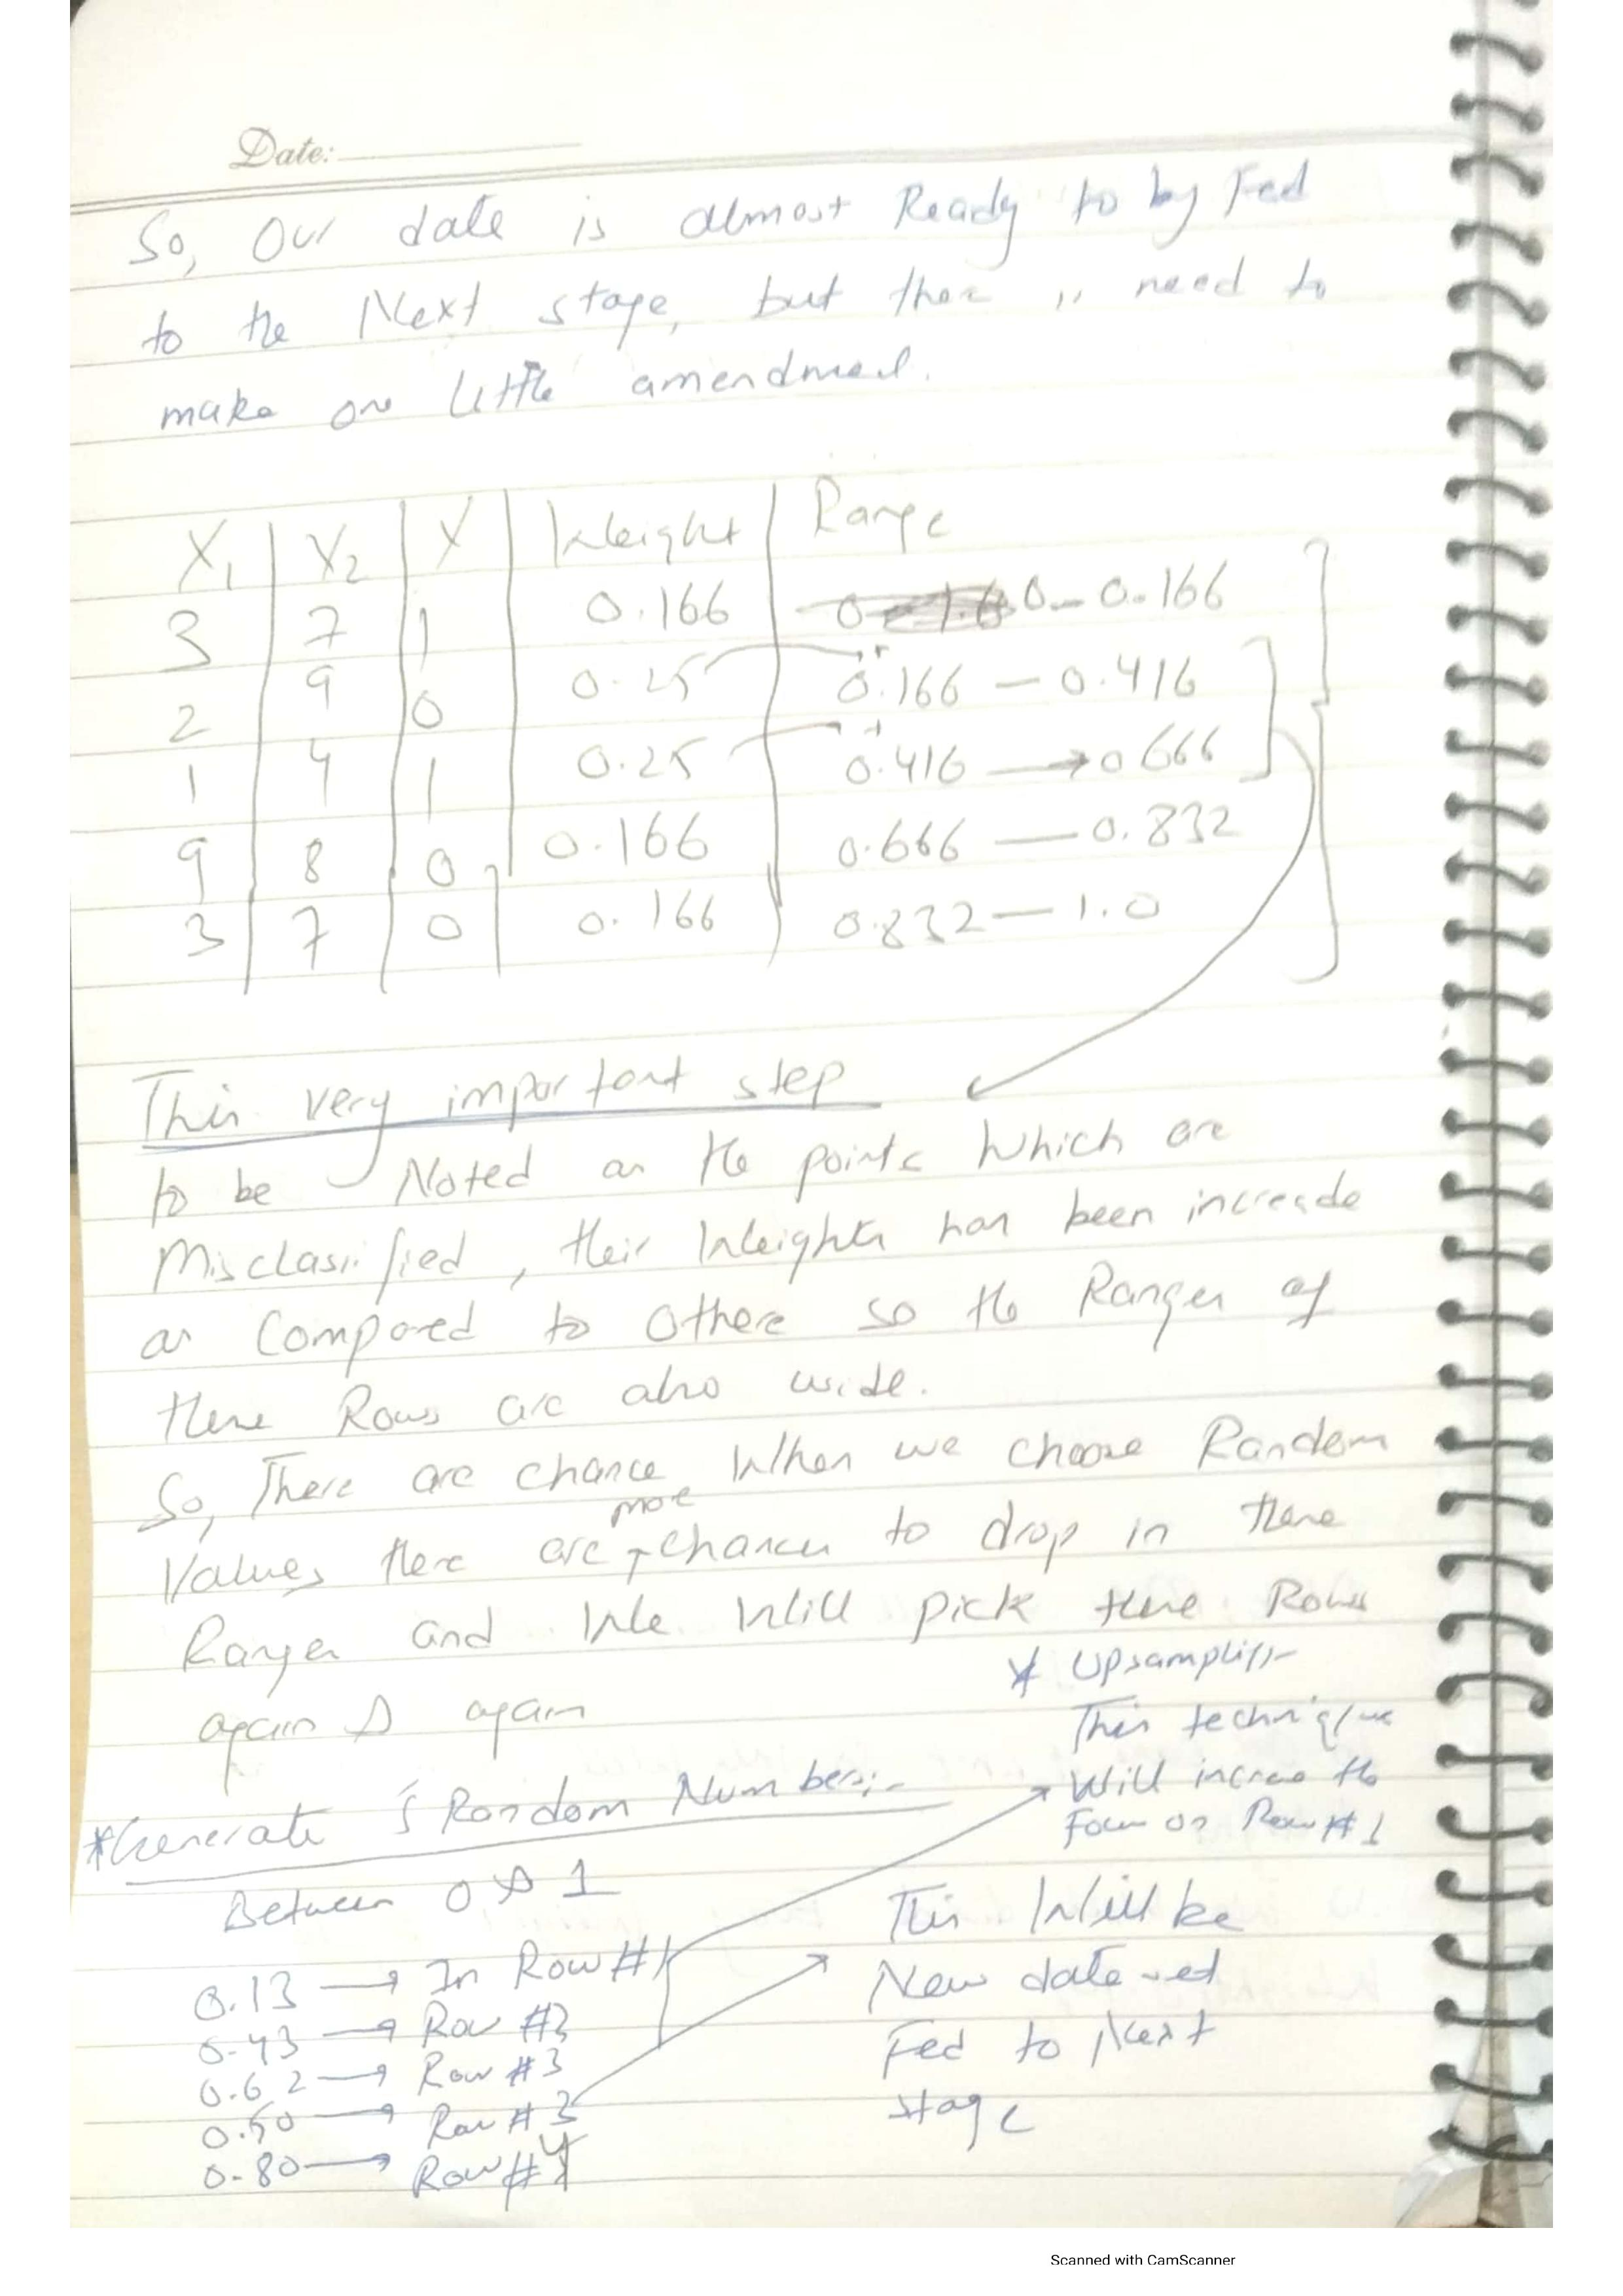

As yiu can see the new data set will be the combination of row1,3,3,3,and 4. Stage 1 will be repeated on this new dataset.

# How Alpha(a or weights came into existence)

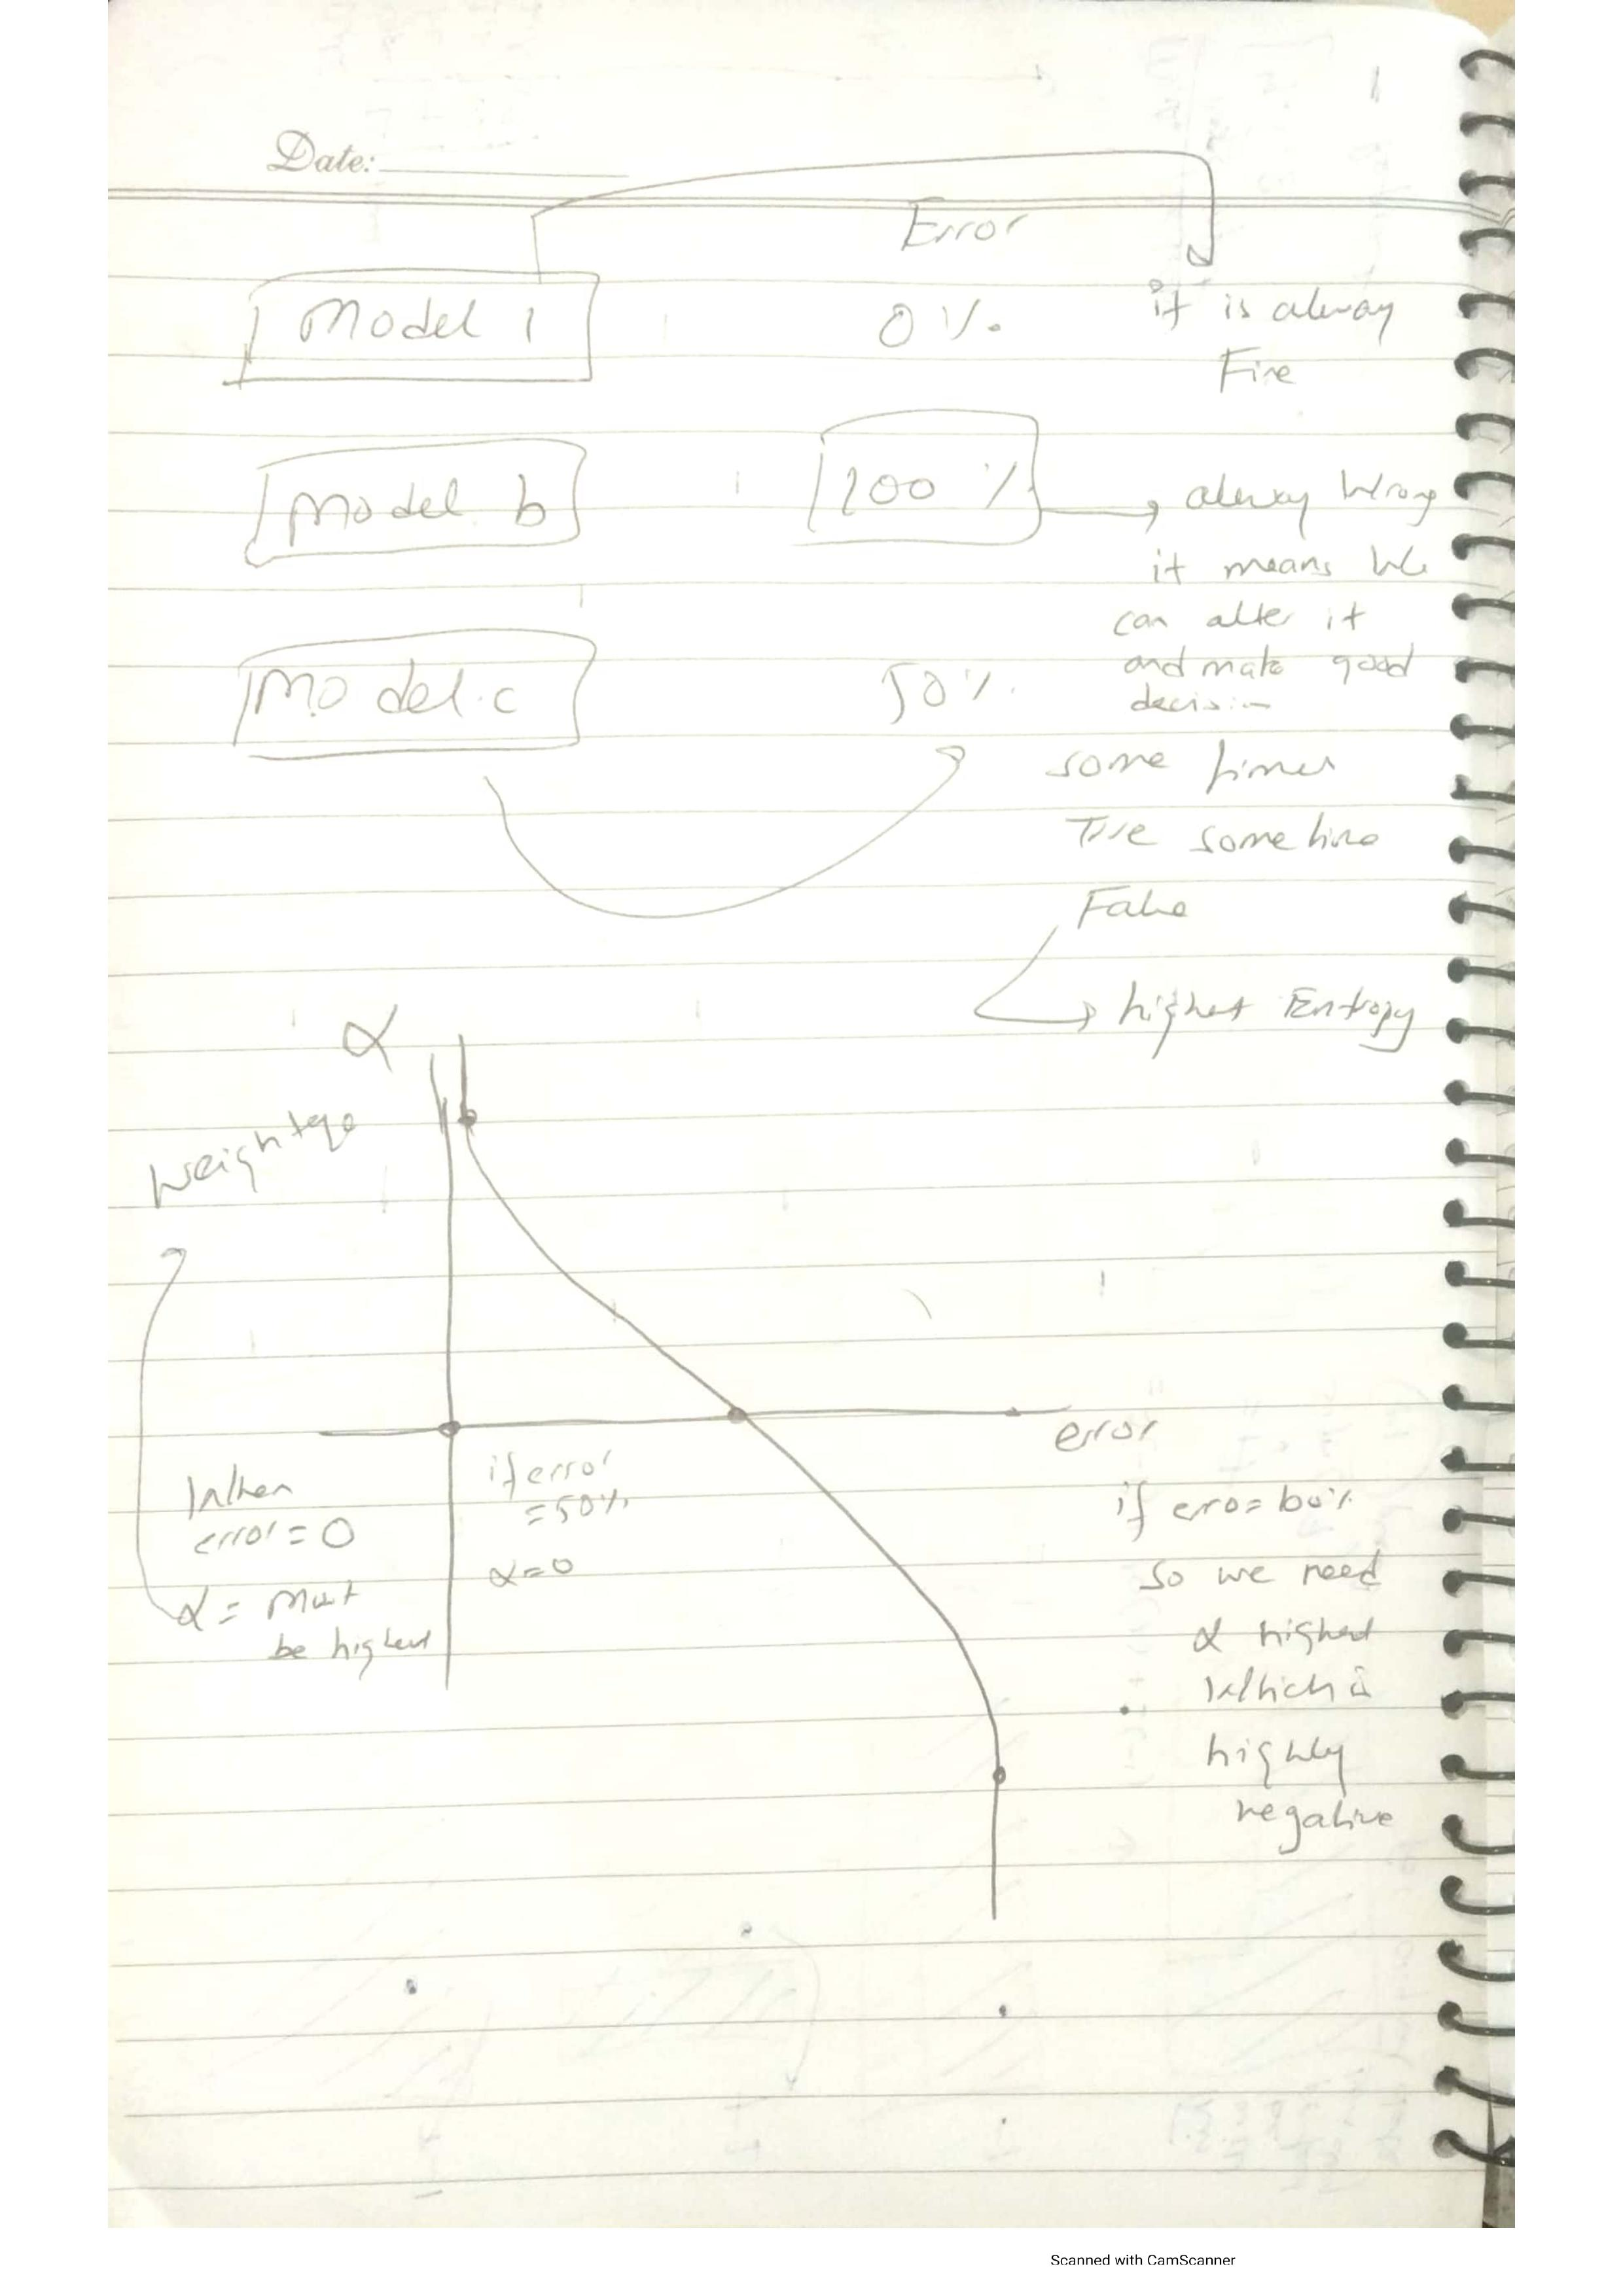

# Coding

In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [3]:
df

X1  X2  label
0   1   5      1
1   2   3      1
2   3   6      0
3   4   8      1
4   5   1      0
5   6   9      1
6   6   5      0
7   7   8      1
8   9   9      0
9   9   2      0

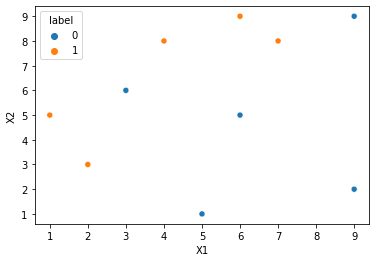

In [4]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

# Weight will assign to all the rows

In [6]:
df['weights'] = 1/df.shape[0]
df

X1  X2  label  weights
0   1   5      1      0.1
1   2   3      1      0.1
2   3   6      0      0.1
3   4   8      1      0.1
4   5   1      0      0.1
5   6   9      1      0.1
6   6   5      0      0.1
7   7   8      1      0.1
8   9   9      0      0.1
9   9   2      0      0.1

# Make a First Decison Stump or Weak Learner

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [8]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

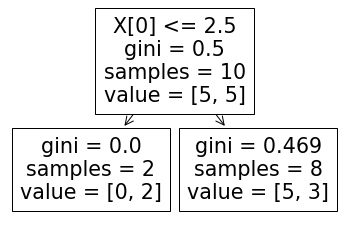

In [9]:
from sklearn.tree import plot_tree
plot_tree(dt1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


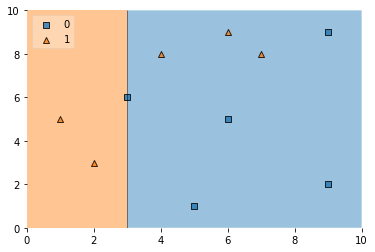

In [15]:
plot_decision_regions(X, y, clf=dt1, legend=2)


In [18]:
df['y_pred'] = dt1.predict(X)
df

X1  X2  label  weights  y_pred
0   1   5      1      0.1       1
1   2   3      1      0.1       1
2   3   6      0      0.1       0
3   4   8      1      0.1       0
4   5   1      0      0.1       0
5   6   9      1      0.1       0
6   6   5      0      0.1       0
7   7   8      1      0.1       0
8   9   9      0      0.1       0
9   9   2      0      0.1       0

Now you can see above that there are total of 3 predictions that have been made misclassified so we add their weights together which 0.3 a.k.a error

In [19]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [20]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [22]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [23]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)


In [25]:
df

X1  X2  label  weights  y_pred  updated_weights
0   1   5      1      0.1       1         0.065508
1   2   3      1      0.1       1         0.065508
2   3   6      0      0.1       0         0.065508
3   4   8      1      0.1       0         0.152653
4   5   1      0      0.1       0         0.065508
5   6   9      1      0.1       0         0.152653
6   6   5      0      0.1       0         0.065508
7   7   8      1      0.1       0         0.152653
8   9   9      0      0.1       0         0.065508
9   9   2      0      0.1       0         0.065508

In [26]:
df['updated_weights'].sum()


0.9165153319682015

In [27]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [28]:
df

X1  X2  label  weights  y_pred  updated_weights  nomalized_weights
0   1   5      1      0.1       1         0.065508           0.071475
1   2   3      1      0.1       1         0.065508           0.071475
2   3   6      0      0.1       0         0.065508           0.071475
3   4   8      1      0.1       0         0.152653           0.166559
4   5   1      0      0.1       0         0.065508           0.071475
5   6   9      1      0.1       0         0.152653           0.166559
6   6   5      0      0.1       0         0.065508           0.071475
7   7   8      1      0.1       0         0.152653           0.166559
8   9   9      0      0.1       0         0.065508           0.071475
9   9   2      0      0.1       0         0.065508           0.071475

In [29]:
df['nomalized_weights'].sum()


1.0

In [32]:
#Will add the value till the index value means the value at 0 index wil add to nithing will remain same the value at index 1 will ad to value at 0 index and new value will save at index 1
# the value at index 2 will add to index 1 and index 0 and new value will be saved at index 2 and similarly this will be recursive till the last index
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']



In [33]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]


X1  X2  label  weights  y_pred  updated_weights  cumsum_lower  cumsum_upper
0   1   5      1      0.1       1         0.065508      0.000000      0.071475
1   2   3      1      0.1       1         0.065508      0.071475      0.142950
2   3   6      0      0.1       0         0.065508      0.142950      0.214425
3   4   8      1      0.1       0         0.152653      0.214425      0.380983
4   5   1      0      0.1       0         0.065508      0.380983      0.452458
5   6   9      1      0.1       0         0.152653      0.452458      0.619017
6   6   5      0      0.1       0         0.065508      0.619017      0.690492
7   7   8      1      0.1       0         0.152653      0.690492      0.857050
8   9   9      0      0.1       0         0.065508      0.857050      0.928525
9   9   2      0      0.1       0         0.065508      0.928525      1.000000

# Creating a new Dataset

In [85]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
#df.iterows() is actually a very strong function it will fetcg indexes and coressponding rows so index will represent the index of row and row will be like a series object that will contain
#X1,X2, label and follow on which has stored in a dataframe
    for index,row in df.iterrows():
      
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [86]:
index_values = create_new_dataset(df)

index_values

[9, 5, 0, 7, 4, 7, 9, 2, 5, 5]

# One Stage has been completed and we have indexes for new datasets

In [47]:
second_df = df.iloc[index_values,[0,1,2,3]]


In [48]:
second_df


X1  X2  label  weights
3   4   8      1      0.1
5   6   9      1      0.1
5   6   9      1      0.1
5   6   9      1      0.1
2   3   6      0      0.1
6   6   5      0      0.1
2   3   6      0      0.1
2   3   6      0      0.1
9   9   2      0      0.1
0   1   5      1      0.1

In [50]:
dt2 = DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

[Text(0.5, 0.75, 'X[1] <= 7.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

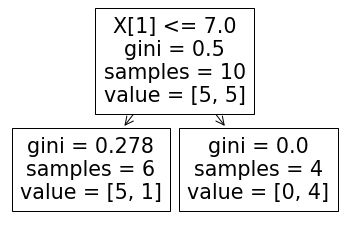

In [52]:
dt2.fit(X,y)
plot_tree(dt2)


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


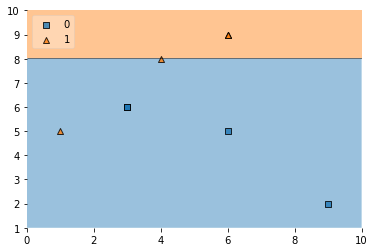

In [53]:
plot_decision_regions(X, y, clf=dt2, legend=2)


In [55]:
second_df['y_pred'] = dt2.predict(X)
second_df


X1  X2  label  weights  y_pred
3   4   8      1      0.1       1
5   6   9      1      0.1       1
5   6   9      1      0.1       1
5   6   9      1      0.1       1
2   3   6      0      0.1       0
6   6   5      0      0.1       0
2   3   6      0      0.1       0
2   3   6      0      0.1       0
9   9   2      0      0.1       0
0   1   5      1      0.1       0

In [57]:
alpha2 = calculate_model_weight(0.1)
alpha2


1.0986122886681098

In [58]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [59]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)


In [60]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()


In [61]:
second_df


X1  X2  label  weights  y_pred  updated_weights  nomalized_weights
3   4   8      1      0.1       1         0.033622           0.056034
5   6   9      1      0.1       1         0.033622           0.056034
5   6   9      1      0.1       1         0.033622           0.056034
5   6   9      1      0.1       1         0.033622           0.056034
2   3   6      0      0.1       0         0.033622           0.056034
6   6   5      0      0.1       0         0.033622           0.056034
2   3   6      0      0.1       0         0.033622           0.056034
2   3   6      0      0.1       0         0.033622           0.056034
9   9   2      0      0.1       0         0.033622           0.056034
0   1   5      1      0.1       0         0.297427           0.495694

In [62]:
second_df['nomalized_weights'].sum()


1.0

In [63]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]


X1  X2  label  weights  y_pred  nomalized_weights  cumsum_lower  \
3   4   8      1      0.1       1           0.056034      0.000000   
5   6   9      1      0.1       1           0.056034      0.056034   
5   6   9      1      0.1       1           0.056034      0.112068   
5   6   9      1      0.1       1           0.056034      0.168102   
2   3   6      0      0.1       0           0.056034      0.224136   
6   6   5      0      0.1       0           0.056034      0.280170   
2   3   6      0      0.1       0           0.056034      0.336204   
2   3   6      0      0.1       0           0.056034      0.392238   
9   9   2      0      0.1       0           0.056034      0.448272   
0   1   5      1      0.1       0           0.495694      0.504306   

   cumsum_upper  
3      0.056034  
5      0.112068  
5      0.168102  
5      0.224136  
2      0.280170  
6      0.336204  
2      0.392238  
2      0.448272  
9      0.504306  
0      1.000000

In [64]:
index_values = create_new_dataset(second_df)


In [65]:
third_df = second_df.iloc[index_values,[0,1,2,3]]


In [66]:
third_df


X1  X2  label  weights
6   6   5      0      0.1
3   4   8      1      0.1
0   1   5      1      0.1
3   4   8      1      0.1
3   4   8      1      0.1
5   6   9      1      0.1
6   6   5      0      0.1
2   3   6      0      0.1
3   4   8      1      0.1
5   6   9      1      0.1

In [67]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


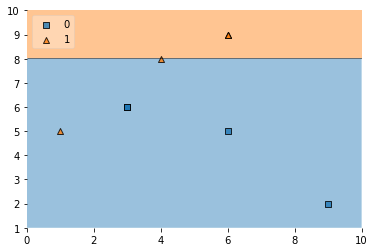

In [68]:
plot_decision_regions(X, y, clf=dt3, legend=2)


In [69]:
third_df['y_pred'] = dt3.predict(X)


In [70]:
third_df


X1  X2  label  weights  y_pred
6   6   5      0      0.1       1
3   4   8      1      0.1       1
0   1   5      1      0.1       1
3   4   8      1      0.1       1
3   4   8      1      0.1       0
5   6   9      1      0.1       0
6   6   5      0      0.1       0
2   3   6      0      0.1       0
3   4   8      1      0.1       0
5   6   9      1      0.1       0

In [71]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [72]:
print(alpha1,alpha2,alpha3)


0.42364893019360184 1.0986122886681098 -0.4236489301936017


# Predictions

# First Prediction

Making a X1, X2 in 2D form to make First Prediction

In [73]:
query = np.array([1,5]).reshape(1,2)
query

array([[1, 5]])

In [74]:
dt1.predict(query)


array([1])

In [75]:
dt2.predict(query)


array([0])

In [76]:
dt3.predict(query)


array([0])

In [77]:
np.sign(1.09)


1.0

# Second Prediction

As 0 is considered as -1

In [78]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [79]:
dt2.predict(query)


array([1])

In [80]:
dt3.predict(query)


array([1])

In [81]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)


-0.2513144282809062

In [82]:
np.sign(-0.25)


-1.0

# Reference

All goes to dedication by Campus X

I made it again to make my learnings.

# Implementing Adaboost by Scikit Learn and Tuning its parameter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [11]:
np.random.seed(42)
#X : array of shape [n_samples, 2](500,2)
#y : array of shape [n_samples] The integer labels (0 or 1) for class membership of each sample
#factor factor : double < 1 (default=.8) Scale factor between inner and outer circle.

X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

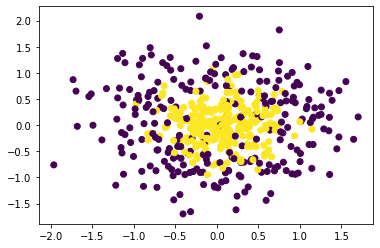

In [12]:
#Only plotting the points
plt.scatter(X[:,0],X[:,1],c=y)

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

cross_val_score(abc,X,y,scoring='accuracy',cv=10)

array([0.88, 0.76, 0.8 , 0.8 , 0.78, 0.8 , 0.84, 0.68, 0.82, 0.7 ])

# Check the accuracy score of model by using default parameters

In [14]:
np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))


0.786

In [15]:
abc.fit(X,y)


AdaBoostClassifier()

# The code below is designed to plot the boundary made by ada boost classifier after passing through all the stages (stage wise additive method)



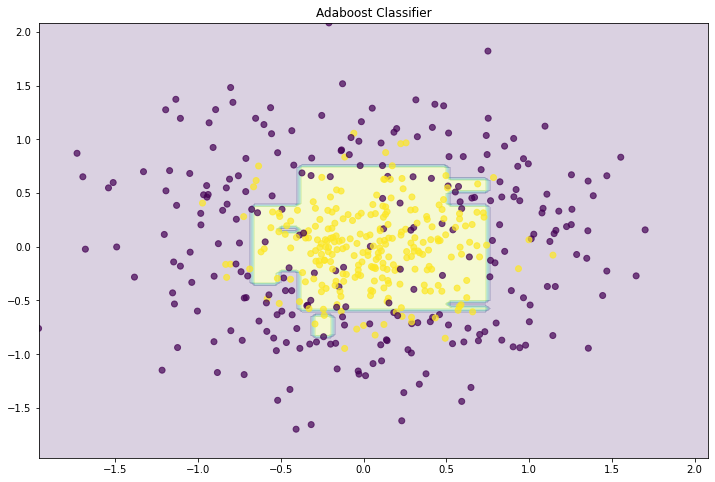

In [16]:

def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

# Now we will tune the hyperparameter by trial and error as there is statement that there is a tradeoff between estimator and learning rate

Now as far as n_estimators are concerned it will decide how many decision stumps must be there if you will put 1 it will only consider one decision stump and you will get only one cut in the data thst will be the clear case of underfitting. As you will go on by increasing it you will have best fitted boundary between your classes and better decsion wil be made. But if you overly exceed the limit then you will see smaller boundaries arround the small points which wil be the clear case of overfitting
 
Now when we find the alpha that is weight assiociated with each descion stump or model, now the learning rate directly multiplies with the alpha the default value is 1.

Now the learning rate value varies between 0-1. For example if we lower the value of learning rate to 0.1 amd multiply it with alpha the weightage will be 10 times lower and this is called **(shrinkage in Boosting)**

Now if you will decrease 



Now coming to the point to dicsuss the trade off between Learning Rate and N_Estimators as if you will just focus on go increasing the decsion stumps like 1000 you have so many models if you will add them together you will have a additive model that will actually overfit the data because of so many boundaries we you have but on the same time if we have 1000 estimator but lowest learning rate what we have then we have small alpha(weightage of model) and if we will update the weight to get new weight we will have smaller effect oon the new weights and eventuall we have small ranges and when we will generate therandom numbers it means we have equall chances to drop a number in all ranges and we have new dataset that will have less focus on misclassified points, so eventually we have slow learning and it will** reduce the effect of overfitting. **


So we are suppose to think optimal hypermeter values for our model that GridSearchCV can do for us.

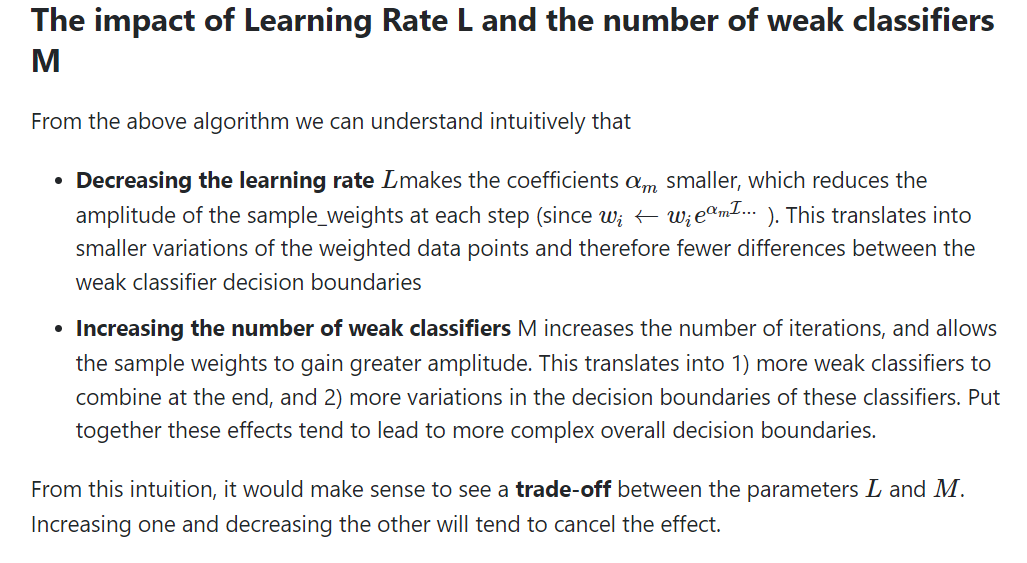

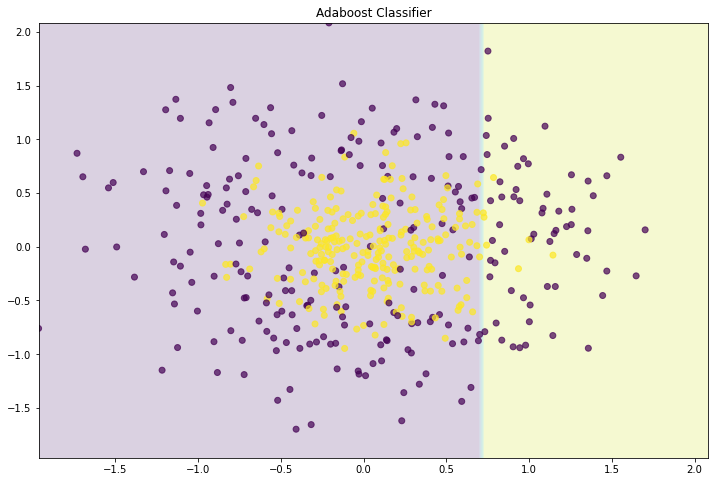

In [29]:
abc = AdaBoostClassifier(n_estimators=20,learning_rate=3)
abc.fit(X,y)
plot_decision_boundary(abc)

# Applying GridSerachCV method to find the best hypermeters and model

The process of choosing the optimal parameters(best model achieved) for the model is called hyperparameter tuning

The modt important thing here is to know how the gridsearchCV is going to work,
Grid serach is going to take two parameters one is the estimator and second is the dictionary of all the parameters and the last parameter cv value the number of folds we want from each iteraion.

Now the grid serach will incorporate  three for loops inside like first it will pick one from estimator this is one loop and then pick one value from learning rate this will be second loop and then pick one value from algorithm this will be thirs loop and will will apply adaboost classifier on X,y it will apply K-fold cross validation with fold value of 10 it will generate the array of 10 different scores and will take an average to get the average score on each iteration. 

In [30]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


Now the results shows that the best hyperparameters are 

# The Reason of using K-fold

As if we will go on using the traditional train test split and appply the algorithm on data everytime I will get the different accuracy score if I will run the train test split again. So this method is not reliable.

So we use k-fold cross validation with value 5 and split the data into the 5 batches everytime and 4 batches are used for training and one will be for testing this way we will get the array of 5 elements with scores and then calculate the average and get the final score.

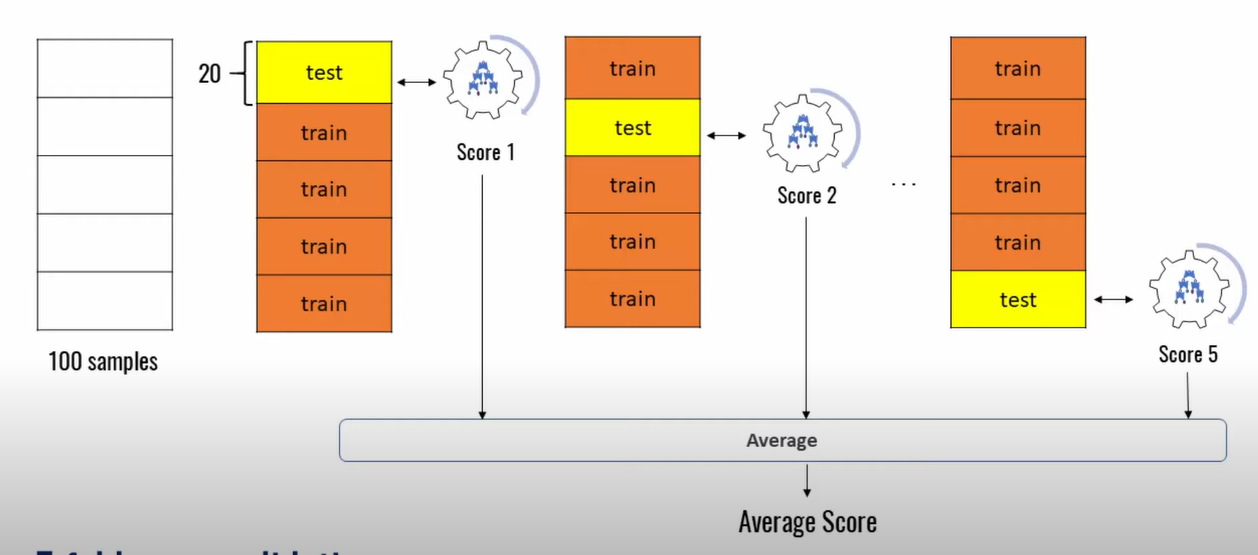

Reference: Campus X, StackOverflow & StackExchange